# Import Thư Viện và Dữ Liệu

In [2]:
#Import Thư viện

import numpy as np
import pandas as pd
import pyodbc as pyo
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar
import datetime as dt
from datetime import datetime
from datetime import date
from calendar import month_name as mn

In [3]:
#Import Dữ Liệu từ SQL

Connection = pyo.connect (driver='{ODBC Driver 17 for SQL Server}', host='LAPTOP-8AI0N3SM', database = 'Telecom_Customer', trusted_connection = 'yes')
querry1 = 'select * from customer'
df = pd.read_sql(sql=querry1,con=Connection)
df.head()

C:\Users\trung\AppData\Local\Temp\ipykernel_8440\543655801.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(sql=querry1,con=Connection)


,Customer_ID,Gender,Age,Married,Number_of_Dependents,City,Zip_Code,Latitude,Longitude,Number_of_Referrals,...,Total_Extra_Data_Charges,Total_Long_Distance_Charges,Total_Revenue,Customer_Status,Churn_Category,Churn_Reason,Customer_rank,Depen_Group,Age_Group,tenure_year
0,4061-UKJWL,Male,35.0,No,0.0,San Francisco,94102.0,37.779500,-122.419233,0.0,...,0.0,61.11,202.81,Joined,None,None,Joined,No,Youth,1 year
1,4062-HBMOS,Male,33.0,No,0.0,Redding,96003.0,40.677649,-122.294670,0.0,...,0.0,281.84,5599.97,Stayed,None,None,VIP,No,Youth,5 year
2,4063-EIKNQ,Male,33.0,Yes,2.0,Canyon Country,91351.0,34.422519,-118.420717,1.0,...,0.0,173.03,422.21,Stayed,None,None,Stayed,Yes,Youth,1 year
3,4065-JJAVA,Female,56.0,No,0.0,Oakland,94605.0,37.758019,-122.138678,0.0,...,30.0,16.99,96.49,Joined,None,None,Joined,No,Middle-age,1 year
4,4067-HLYQI,Female,43.0,No,0.0,Colton,92324.0,34.030915,-117.273201,0.0,...,60.0,1631.85,4097.95,Stayed,None,None,VIP,No,Middle-age,3 year


# Phân Tích Hành Vi Khách Hàng Dựa Trên Nhân Khẩu Học

  Married  VIP_count
0      No        758
1     Yes       1558
  Married  Churn_count
0      No         1200
1     Yes          669


Text(0.5, 1.0, 'Total_CustomerChurn_by_Married')

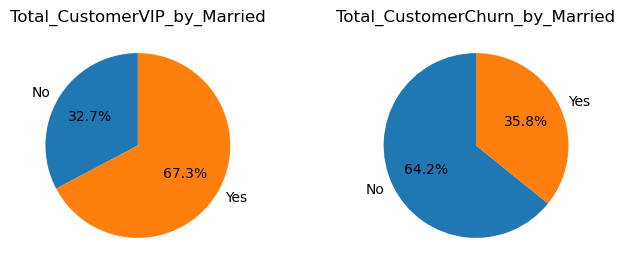

In [4]:
##So sánh hai nhóm khách hàng VIP và CHURN dựa trên tình trạng hôn nhân


##Đếm tổng số lần mua hàng của khách hàng 
def count_vip(x):
    return sum(x == 'VIP')
##Độ tuổi khách hàng VIP
df_marriVIP = df.groupby('Married')['Customer_rank'].apply(count_vip).reset_index(name='VIP_count')
print(df_marriVIP.head(5))
##Đếm tổng số lần mua hàng của khách hàng Churn
def count_churn(x):
    return sum(x == 'Churned')
##Độ tuổi khách hàng Churn
df_marriChurn = df.groupby('Married')['Customer_rank'].apply(count_churn).reset_index(name='Churn_count')
print(df_marriChurn.head(5))

##Vẽ biểu đồ
fig, ax1 = plt.subplots(1, 2, figsize = [8,3])

ax1[0].pie(df_marriVIP['VIP_count'], labels=df_marriVIP['Married'], startangle=90, autopct='%1.1f%%')
ax1[0].set_title('Total_CustomerVIP_by_Married')

ax1[1].pie(df_marriChurn['Churn_count'], labels=df_marriChurn['Married'], startangle=90, autopct='%1.1f%%')
ax1[1].set_title('Total_CustomerChurn_by_Married')

  Depen_Group  VIP_count
0          No       1639
1         Yes        677
  Depen_Group  Churn_count
0          No         1763
1         Yes          106


Text(0.5, 1.0, 'Total_CustomerChurn_by_Denpendent')

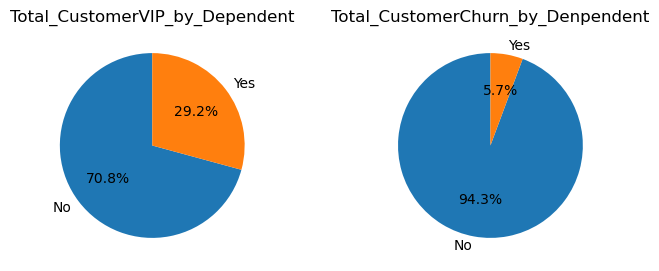

In [5]:
##So sánh hai nhóm khách hàng VIP và CHURN dựa trên nhóm khách hàng có người phụ thuộc hay không

##Truy xuất dữ liệu
def count_vip(x):
    return sum(x == 'VIP')

df_depenVIP = df.groupby('Depen_Group')['Customer_rank'].apply(count_vip).reset_index(name='VIP_count')
print(df_depenVIP.head(5))

def count_churn(x):
    return sum(x == 'Churned')

df_depenChurn = df.groupby('Depen_Group')['Customer_rank'].apply(count_churn).reset_index(name='Churn_count')
print(df_depenChurn.head(5))

##Vẽ biểu đồ
fig, ax1 = plt.subplots(1, 2, figsize = [8,3])

ax1[0].pie(df_depenVIP['VIP_count'], labels=df_depenVIP['Depen_Group'], startangle=90, autopct='%1.1f%%')
ax1[0].set_title('Total_CustomerVIP_by_Dependent')

ax1[1].pie(df_depenChurn['Churn_count'], labels=df_depenChurn['Depen_Group'], startangle=90, autopct='%1.1f%%')
ax1[1].set_title('Total_CustomerChurn_by_Denpendent')

    Age_Group  VIP_count
0  Middle-age       1228
1     Old age        375
2       Youth        713
    Age_Group  Churn_count
0  Middle-age          932
1     Old age          445
2       Youth          492


Text(0.5, 1.0, 'Total_CustomerChurn_by_Group_Age')

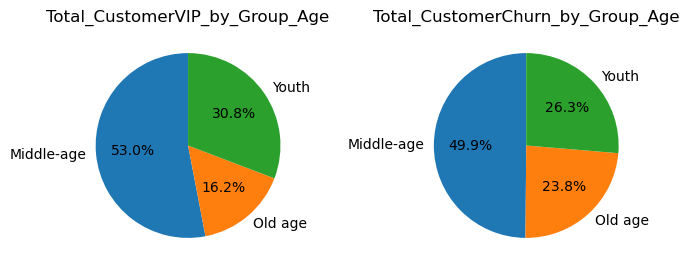

In [6]:
##So sánh hai nhóm khách hàng VIP và CHURN dựa trên nhóm tuổi

##Truy xuất dữ liệu
def count_vip(x):
    return sum(x == 'VIP')

df_ageVIP = df.groupby('Age_Group')['Customer_rank'].apply(count_vip).reset_index(name='VIP_count')
print(df_ageVIP.head(5))

def count_churn(x):
    return sum(x == 'Churned')

df_ageChurn = df.groupby('Age_Group')['Customer_rank'].apply(count_churn).reset_index(name='Churn_count')
print(df_ageChurn.head(5))

##Vẽ biểu đồ
fig, ax1 = plt.subplots(1, 2, figsize = [8,3])

ax1[0].pie(df_ageVIP['VIP_count'], labels=df_ageVIP['Age_Group'], startangle=90, autopct='%1.1f%%')
ax1[0].set_title('Total_CustomerVIP_by_Group_Age')

ax1[1].pie(df_ageChurn['Churn_count'], labels=df_ageChurn['Age_Group'], startangle=90, autopct='%1.1f%%')
ax1[1].set_title('Total_CustomerChurn_by_Group_Age')

  Phone_Service  VIP_count
0            No        105
1           Yes       2211
  Phone_Service  Churn_count
0            No          170
1           Yes         1699


Text(0.5, 1.0, 'Total_CustomerChurn_by_Phone_Service')

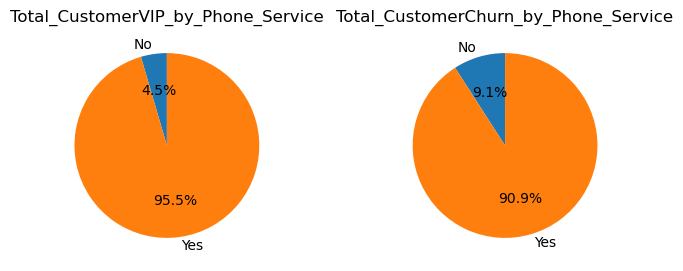

In [7]:
##So sánh hai nhóm khách hàng VIP và CHURN dựa trên dịch vụ điện thoại tại nhà

##Truy xuất dữ liệu
def count_vip(x):
    return sum(x == 'VIP')

df_phonesvVIP = df.groupby('Phone_Service')['Customer_rank'].apply(count_vip).reset_index(name='VIP_count')
print(df_phonesvVIP.head(5))

def count_churn(x):
    return sum(x == 'Churned')

df_phonesvChurn = df.groupby('Phone_Service')['Customer_rank'].apply(count_churn).reset_index(name='Churn_count')
print(df_phonesvChurn.head(5))

##Vẽ biểu đồ
fig, ax1 = plt.subplots(1, 2, figsize = [8,3])

ax1[0].pie(df_phonesvVIP['VIP_count'], labels=df_phonesvVIP['Phone_Service'], startangle=90, autopct='%1.1f%%')
ax1[0].set_title('Total_CustomerVIP_by_Phone_Service')

ax1[1].pie(df_phonesvChurn['Churn_count'], labels=df_phonesvChurn['Phone_Service'], startangle=90, autopct='%1.1f%%')
ax1[1].set_title('Total_CustomerChurn_by_Phone_Service')

  Internet_Type  VIP_count
0         Cable        268
1           DSL        593
2   Fiber Optic       1246
  Internet_Type  Churn_count
0         Cable          213
1           DSL          307
2   Fiber Optic         1236


Text(0.5, 1.0, 'Total_CustomerChurn_by_InterType')

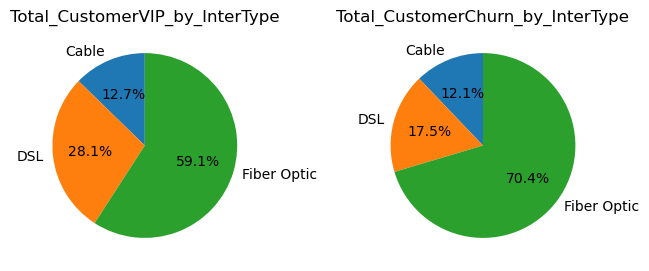

In [8]:
##So sánh hai nhóm khách hàng VIP và CHURN dựa trên loại kết nối internet

##Truy xuất dữ liệu
def count_vip(x):
    return sum(x == 'VIP')

df_intertypeVIP = df.groupby('Internet_Type')['Customer_rank'].apply(count_vip).reset_index(name='VIP_count')
print(df_intertypeVIP.head(5))

def count_churn(x):
    return sum(x == 'Churned')

df_intertypeChurn = df.groupby('Internet_Type')['Customer_rank'].apply(count_churn).reset_index(name='Churn_count')
print(df_intertypeChurn.head(5))

##Vẽ biểu đồ
fig, ax1 = plt.subplots(1, 2, figsize = [8,3])

ax1[0].pie(df_intertypeVIP['VIP_count'], labels=df_intertypeVIP['Internet_Type'], startangle=90, autopct='%1.1f%%')
ax1[0].set_title('Total_CustomerVIP_by_InterType')

ax1[1].pie(df_intertypeChurn['Churn_count'], labels=df_intertypeChurn['Internet_Type'], startangle=90, autopct='%1.1f%%')
ax1[1].set_title('Total_CustomerChurn_by_InterType')

         Contract  VIP_count
0  Month-to-Month        442
1        One Year        717
2        Two Year       1157
         Contract  Churn_count
0  Month-to-Month         1655
1        One Year          166
2        Two Year           48


Text(0.5, 1.0, 'Total_CustomerChurn_by_Contract')

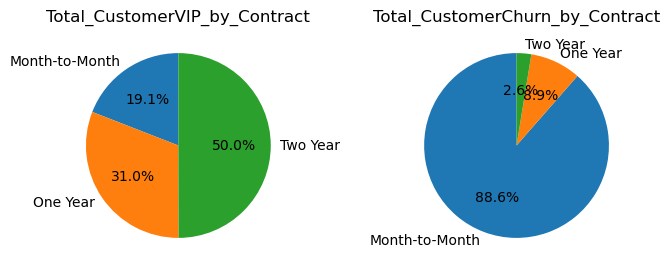

In [9]:
##So sánh hai nhóm khách hàng VIP và CHURN dựa trên hợp đồng sử dụng


##Truy xuất dữ liệu
def count_vip(x):
    return sum(x == 'VIP')

df_ContractVIP = df.groupby('Contract')['Customer_rank'].apply(count_vip).reset_index(name='VIP_count')
print(df_ContractVIP.head(5))

def count_churn(x):
    return sum(x == 'Churned')

df_ContractChurn = df.groupby('Contract')['Customer_rank'].apply(count_churn).reset_index(name='Churn_count')
print(df_ContractChurn.head(5))

##Vẽ biểu đồ
fig, ax1 = plt.subplots(1, 2, figsize = [8,3])

ax1[0].pie(df_ContractVIP['VIP_count'], labels=df_ContractVIP['Contract'], startangle=90, autopct='%1.1f%%')
ax1[0].set_title('Total_CustomerVIP_by_Contract')

ax1[1].pie(df_ContractChurn['Churn_count'], labels=df_ContractChurn['Contract'], startangle=90, autopct='%1.1f%%')
ax1[1].set_title('Total_CustomerChurn_by_Contract')

rank             Servicetype  Churned  Joined  Stayed   VIP
0            Online_Security      295      46     496  1182
1              Online_Backup      523      54     475  1377
2     Device_Protection_Plan      545      32     464  1381
3       Premium_Tech_Support      310      47     485  1202
4               Streaming_TV      814      49     454  1390
5           Streaming_Movies      818      49     462  1403
6            Streaming_Music      728      52     446  1262


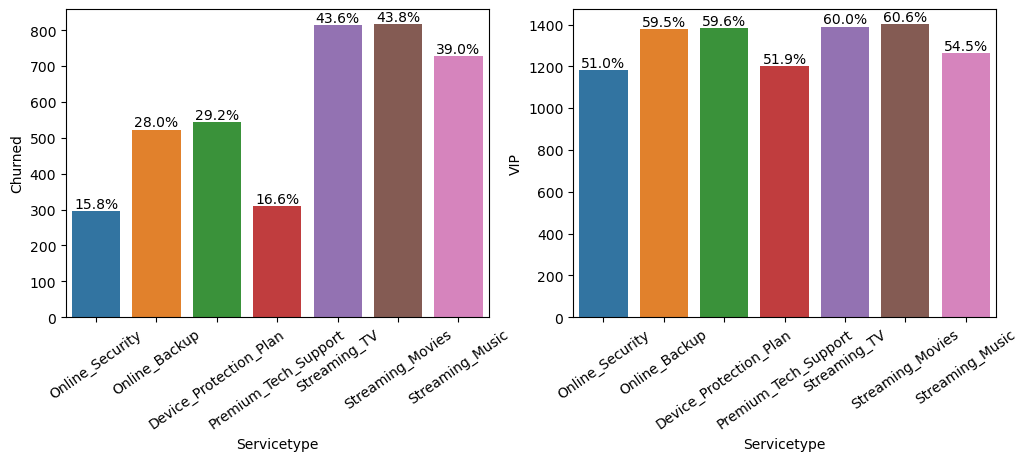

In [10]:
##So sánh hai nhóm khách hàng VIP và CHURN dựa trên sản phẩm dịch vụ đi kèm

##Truy xuất dữ liệu
df_service = df.groupby('Customer_rank').agg({'Online_Security': lambda x: (x == 'Yes').sum()
                                             , 'Online_Backup': lambda x: (x == 'Yes').sum()
                                             , 'Device_Protection_Plan': lambda x: (x == 'Yes').sum()
                                             , 'Premium_Tech_Support': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_TV': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_Movies': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_Music': lambda x: (x == 'Yes').sum()}).reset_index()
df_service = df_service.rename (columns = {'Customer_rank': 'rank'})
df_transposed = df_service.set_index('rank').transpose().reset_index()
df_transposed = df_transposed.rename (columns = {'index': 'Servicetype'})

print(df_transposed.head(10))

##Vẽ biểu đồ
fig, ax = plt.subplots(1, 2, figsize=[12, 4])

sns.barplot(data=df_transposed, x=df_transposed['Servicetype'], y=df_transposed['Churned'], ax=ax[0])
sns.barplot(data=df_transposed, x=df_transposed['Servicetype'], y=df_transposed['VIP'], ax=ax[1])

# Chỉnh góc quay của nhãn trục x
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=35)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=35)

# Hiển thị giá trị phần trăm so với tổng các cột mỗi bên

def count_churn(x):
    return sum(x == 'Churned')

def count_VIP(x):
    return sum(x == 'VIP')

total_churned = count_churn(df['Customer_rank'])
total_vip = count_VIP(df['Customer_rank'])

for p in ax[0].patches:
    percentage = f'{(p.get_height() / total_churned * 100):.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax[0].annotate(percentage, (x, y), ha='center', va='bottom')

for p in ax[1].patches:
    percentage = f'{(p.get_height() / total_vip * 100):.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax[1].annotate(percentage, (x, y), ha='center', va='bottom')


Từ những phân tích trên ta có thể kết luận:

- Các yếu tố về nhóm tuổi, dịch vụ điện thoại bàn, lựa chọn loại kết nối internet không có sự khác biệt quá lớn giữa 2 nhóm khách hàng, từ đó ta không xét đến các yếu tố này trong phân tích tiếp theo.
    
- Khách hàng chưa kết hôn, không có người phụ thuộc, sử dụng dịch vụ Month_to_Month, và 3 sản phẩm đi kèm Streaming_TV, Streaming_Movies, Streaming_Music có sự khác biệt và tỷ lệ rời bỏ cao hơn bất thường so với các yếu tố còn lại tương ứng.
    
=> Dựa trên các yếu tố khác biệt trên, ta tiến hành phân tích hành vi khách hàng CHURN dựa trên mối liên hệ giữa yếu tố nhân khẩu học và sản phẩm dịch vụ khách hàng sử dụng.


# Phân Tích Hành Vi Khách Hàng Dựa Trên Nhóm Sản Phẩm Dịch Vụ Đi Kèm

Married             Servicetype   No  Yes
0               Online_Security  358  824
1                 Online_Backup  423  954
2        Device_Protection_Plan  437  944
3          Premium_Tech_Support  369  833
4                  Streaming_TV  441  949
5              Streaming_Movies  449  954
6               Streaming_Music  399  863


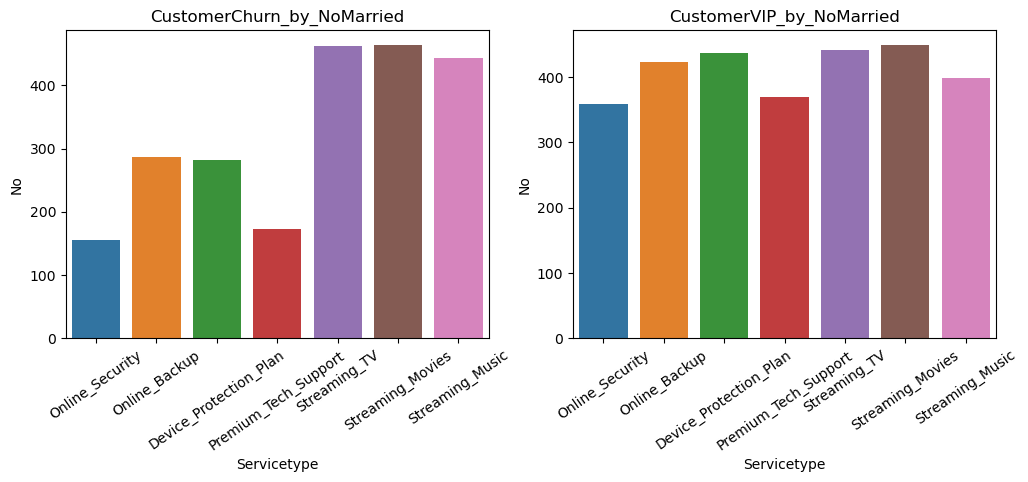

In [11]:
##So sánh hai nhóm khách hàng VIP và CHURN dựa trên dịch vụ đi kèm và yếu tố sống độc thân

#Truy xuất dữ liệu
df_cusnomarriservice = df[df['Customer_rank'] == 'Churned'].groupby('Married').agg({'Online_Security': lambda x: (x == 'Yes').sum()
                                             , 'Online_Backup': lambda x: (x == 'Yes').sum()
                                             , 'Device_Protection_Plan': lambda x: (x == 'Yes').sum()
                                             , 'Premium_Tech_Support': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_TV': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_Movies': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_Music': lambda x: (x == 'Yes').sum()}).reset_index()
df_cusnomarriservice_trans = df_cusnomarriservice.set_index('Married').transpose().reset_index()
df_cusnomarriservice_tran = df_cusnomarriservice_trans.rename (columns = {'index': 'Servicetype'})

df_cusnomarriservice_tran.head(10)

df_nomarriVIP = df[df['Customer_rank'] == 'VIP'].groupby('Married').agg({'Online_Security': lambda x: (x == 'Yes').sum()
                                             , 'Online_Backup': lambda x: (x == 'Yes').sum()
                                             , 'Device_Protection_Plan': lambda x: (x == 'Yes').sum()
                                             , 'Premium_Tech_Support': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_TV': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_Movies': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_Music': lambda x: (x == 'Yes').sum()}).reset_index()
df2 = df_nomarriVIP.set_index('Married').transpose().reset_index()
df22 = df2.rename (columns = {'index': 'Servicetype'})

print(df22.head(10))

#Vẽ biểu đồ
fig, ax = plt.subplots(1, 2, figsize=[12, 4])

sns.barplot(data=df_cusnomarriservice_tran, x=df_cusnomarriservice_tran['Servicetype'], y=df_cusnomarriservice_tran['No'], ax=ax[0])
sns.barplot(data=df22, x=df22['Servicetype'], y=df22['No'], ax=ax[1])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=35)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=35)

ax[0].set_title("CustomerChurn_by_NoMarried")
ax[1].set_title("CustomerVIP_by_NoMarried")

plt.show()

Depen_Group             Servicetype    No  Yes
0                   Online_Security   835  347
1                     Online_Backup   977  400
2            Device_Protection_Plan  1004  377
3              Premium_Tech_Support   852  350
4                      Streaming_TV  1002  388
5                  Streaming_Movies  1032  371
6                   Streaming_Music   902  360


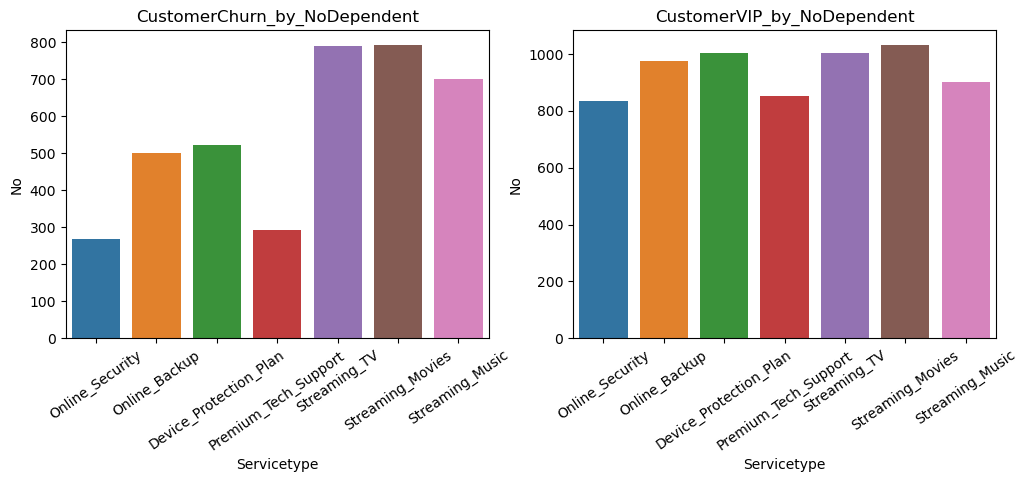

In [12]:
##So sánh hai nhóm khách hàng VIP và CHURN dựa trên dịch vụ đi kèm và yếu tố không có người phụ thuộc

#Truy xuất dữ liệu
df_cusnodepenservice = df[df['Customer_rank'] == 'Churned'].groupby('Depen_Group').agg({'Online_Security': lambda x: (x == 'Yes').sum()
                                             , 'Online_Backup': lambda x: (x == 'Yes').sum()
                                             , 'Device_Protection_Plan': lambda x: (x == 'Yes').sum()
                                             , 'Premium_Tech_Support': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_TV': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_Movies': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_Music': lambda x: (x == 'Yes').sum()}).reset_index()
df_cusnodepenservice_trans = df_cusnodepenservice.set_index('Depen_Group').transpose().reset_index()
df_cusnodepenservice_tran = df_cusnodepenservice_trans.rename (columns = {'index': 'Servicetype'})

df_cusnodepenservice_tran.head(10)

df_cusnodepenserviceVIP = df[df['Customer_rank'] == 'VIP'].groupby('Depen_Group').agg({'Online_Security': lambda x: (x == 'Yes').sum()
                                             , 'Online_Backup': lambda x: (x == 'Yes').sum()
                                             , 'Device_Protection_Plan': lambda x: (x == 'Yes').sum()
                                             , 'Premium_Tech_Support': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_TV': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_Movies': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_Music': lambda x: (x == 'Yes').sum()}).reset_index()
df3 = df_cusnodepenserviceVIP.set_index('Depen_Group').transpose().reset_index()
df33 = df3.rename (columns = {'index': 'Servicetype'})

print(df33.head(10))

#Vẽ biểu đồ
fig, ax = plt.subplots(1, 2, figsize=[12, 4])

sns.barplot(data=df_cusnodepenservice_tran, x=df_cusnodepenservice_tran['Servicetype'], y=df_cusnodepenservice_tran['No'], ax=ax[0])
sns.barplot(data=df33, x=df33['Servicetype'], y=df33['No'], ax=ax[1])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=35)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=35)

ax[0].set_title("CustomerChurn_by_NoDependent")
ax[1].set_title("CustomerVIP_by_NoDependent")

plt.show()

Contract             Servicetype  Month-to-Month  One Year  Two Year
0                Online_Security             164       351       667
1                  Online_Backup             249       432       696
2         Device_Protection_Plan             203       422       756
3           Premium_Tech_Support             142       334       726
4                   Streaming_TV             237       429       724
5               Streaming_Movies             229       437       737
6                Streaming_Music             222       379       661


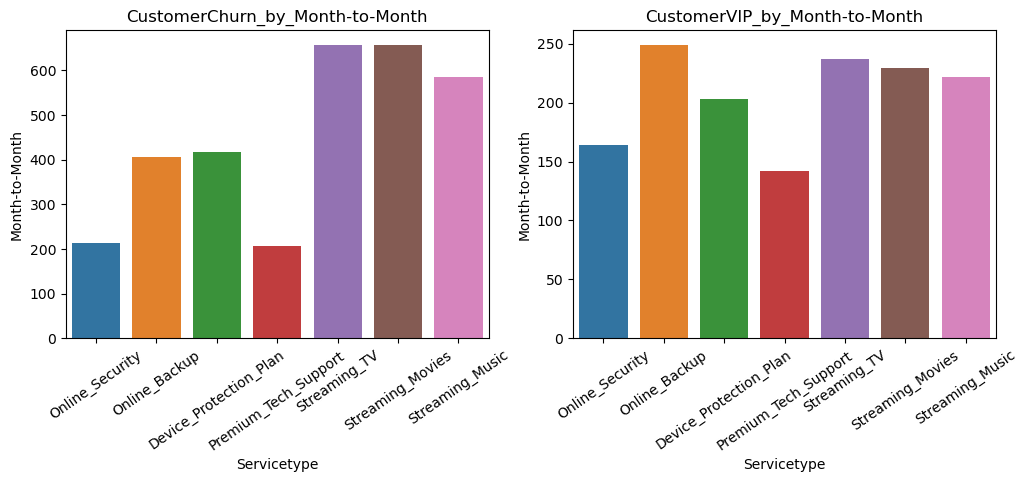

In [13]:
##So sánh hai nhóm khách hàng VIP và CHURN dựa trên dịch vụ đi kèm và yếu tố sử dụng hợp đồng một tháng

df_cuscontract = df[df['Customer_rank'] == 'Churned'].groupby('Contract').agg({'Online_Security': lambda x: (x == 'Yes').sum()
                                             , 'Online_Backup': lambda x: (x == 'Yes').sum()
                                             , 'Device_Protection_Plan': lambda x: (x == 'Yes').sum()
                                             , 'Premium_Tech_Support': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_TV': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_Movies': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_Music': lambda x: (x == 'Yes').sum()}).reset_index()
df_cuscontract_trans = df_cuscontract.set_index('Contract').transpose().reset_index()
df_cuscontract_tran = df_cuscontract_trans.rename (columns = {'index': 'Servicetype'})

df_cuscontract_tran.head(10)

df_cuscontractVIP = df[df['Customer_rank'] == 'VIP'].groupby('Contract').agg({'Online_Security': lambda x: (x == 'Yes').sum()
                                             , 'Online_Backup': lambda x: (x == 'Yes').sum()
                                             , 'Device_Protection_Plan': lambda x: (x == 'Yes').sum()
                                             , 'Premium_Tech_Support': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_TV': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_Movies': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_Music': lambda x: (x == 'Yes').sum()}).reset_index()
df5 = df_cuscontractVIP.set_index('Contract').transpose().reset_index()
df55 = df5.rename (columns = {'index': 'Servicetype'})

print(df55.head(10))

#Vẽ biểu đồ
fig, ax = plt.subplots(1, 2, figsize=[12, 4])

sns.barplot(data=df_cuscontract_tran, x=df_cuscontract_tran['Servicetype'], y=df_cuscontract_tran['Month-to-Month'], ax=ax[0])
sns.barplot(data=df55, x=df55['Servicetype'], y=df55['Month-to-Month'], ax=ax[1])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=35)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=35)

ax[0].set_title("CustomerChurn_by_Month-to-Month")
ax[1].set_title("CustomerVIP_by_Month-to-Month")

plt.show()

tenure_year             Servicetype  2 year  3 year  4 year  5 year  6 year
0                   Online_Security       4      89     159     243     687
1                     Online_Backup       8     111     189     295     774
2            Device_Protection_Plan       5     114     206     287     769
3              Premium_Tech_Support       2      98     155     257     690
4                      Streaming_TV      13     136     213     300     728
5                  Streaming_Movies      13     135     203     304     748
6                   Streaming_Music      12     116     186     266     682


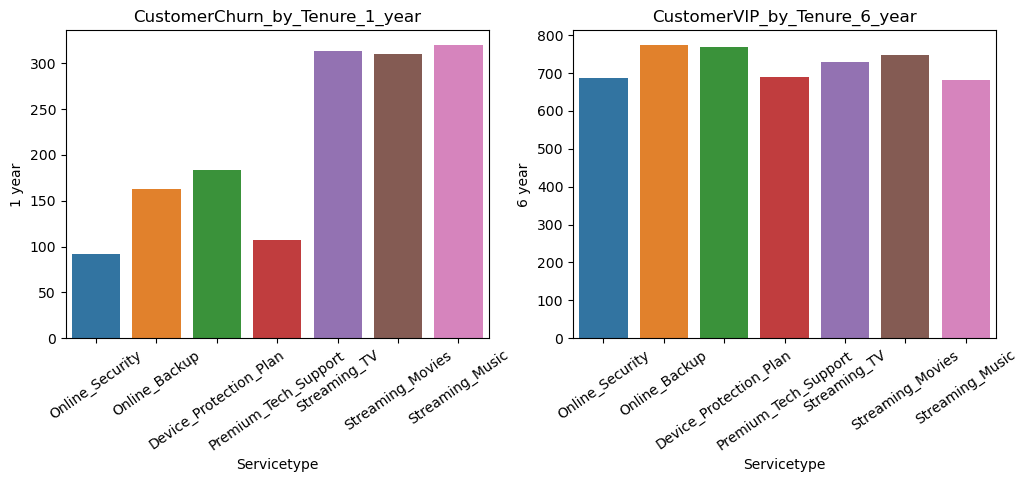

In [14]:
##So sánh hai nhóm khách hàng VIP và CHURN dựa trên dịch vụ đi kèm và số năm gắn bó với dịch vụ

#Truy xuất dữ liệu
df_custenureyear = df[df['Customer_rank'] == 'Churned'].groupby('tenure_year').agg({'Online_Security': lambda x: (x == 'Yes').sum()
                                             , 'Online_Backup': lambda x: (x == 'Yes').sum()
                                             , 'Device_Protection_Plan': lambda x: (x == 'Yes').sum()
                                             , 'Premium_Tech_Support': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_TV': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_Movies': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_Music': lambda x: (x == 'Yes').sum()}).reset_index()
df_custenureyear_trans = df_custenureyear.set_index('tenure_year').transpose().reset_index()
df_custenureyear_tran = df_custenureyear_trans.rename (columns = {'index': 'Servicetype'})

df_custenureyear_tran.head(10)

df_custenureyearVIP = df[df['Customer_rank'] == 'VIP'].groupby('tenure_year').agg({'Online_Security': lambda x: (x == 'Yes').sum()
                                             , 'Online_Backup': lambda x: (x == 'Yes').sum()
                                             , 'Device_Protection_Plan': lambda x: (x == 'Yes').sum()
                                             , 'Premium_Tech_Support': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_TV': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_Movies': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_Music': lambda x: (x == 'Yes').sum()}).reset_index()
df6 = df_custenureyearVIP.set_index('tenure_year').transpose().reset_index()
df66 = df6.rename (columns = {'index': 'Servicetype'})

print(df66.head(10))

#Vẽ biểu đồ
fig, ax = plt.subplots(1, 2, figsize=[12, 4])

sns.barplot(data=df_custenureyear_tran, x=df_custenureyear_tran['Servicetype'], y=df_custenureyear_tran['1 year'], ax=ax[0])
sns.barplot(data=df66, x=df66['Servicetype'], y=df66['6 year'], ax=ax[1])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=35)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=35)

ax[0].set_title("CustomerChurn_by_Tenure_1_year")
ax[1].set_title("CustomerVIP_by_Tenure_6_year")

plt.show()

Xét các yếu tố liên quan đến 3 dịch vụ Streaming đi kèm ta đều thấy rằng các yếu tố về nhân khẩu học và loại hợp đồng sử dụng đều có lượng khách hàng rời bỏ cao hơn bất thường ở 3 dịch vụ này, nó còn ảnh hưởng đến cả khả năng gắng bó của khách hàng với dịch vụ Công ty.

# Phân Tích Nguyên Nhân Khách Hàng Rời Bỏ Dịch Vụ

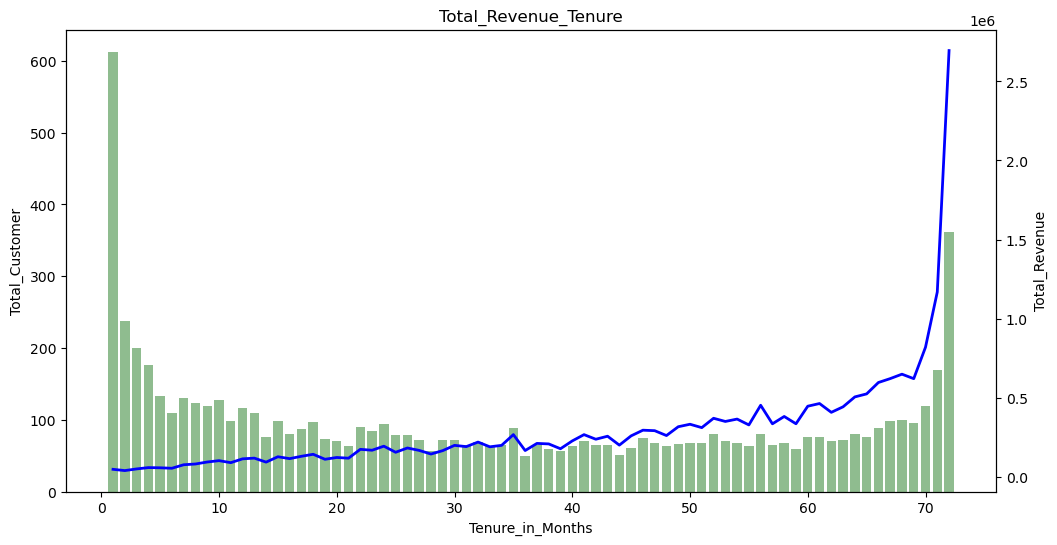

In [15]:
#Phân tích hành vi khách hàng dựa trên thời gian gắn bó của khách hàng

#Truy xuất dữ liệu
df_tenure_revenue = df.groupby('Tenure_in_Months').agg({'Customer_ID': 'count', 'Total_Revenue': 'sum'}).reset_index()
df_tenure_revenue.head()

#Vẽ biểu đồ
fig, ax = plt.subplots(figsize = [12,6])

ax.set_xlabel('Tenure_in_Months')
ax.set_ylabel('Total_Customer')
ax.bar(df_tenure_revenue['Tenure_in_Months'], df_tenure_revenue['Customer_ID'], color='darkseagreen')

ax = ax.twinx()
ax.set_ylabel('Total_Revenue')
ax.plot(df_tenure_revenue['Tenure_in_Months'], df_tenure_revenue['Total_Revenue'], color='blue', linewidth=2)
ax.set_title('Total_Revenue_Tenure')

plt.show()

Lượng khách hàng có thời gian hợp đồng sử dụng hợp đồng 1 tháng có xu hướng rời bỏ dịch vụ rất cao do dễ dàng thay đỗi lựa chọn khi không có nhiều sự ràng buộc

    Churn_Category  Customer_ID
0         Attitude          314
1       Competitor          841
2  Dissatisfaction          321
3            Other          182
4            Price          211


Text(0.5, 1.0, 'Churn_Category')

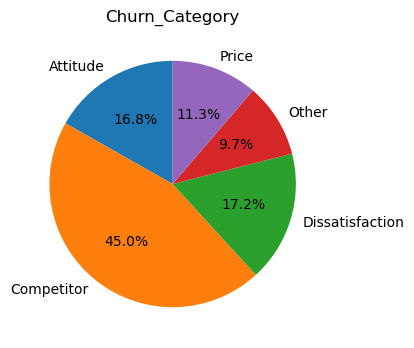

In [16]:
#Phân bổ nguyên nhân khách hàng rời bỏ dịch vụ

#Truy xuất dữ liệu
df_churncategory = df.groupby('Churn_Category').agg({'Customer_ID': 'count'
                                                                                    }).reset_index()
print(df_churncategory.head(5))

#Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=[12, 4])

ax1.pie(df_churncategory['Customer_ID'], labels=df_churncategory['Churn_Category'], startangle=90, autopct='%1.1f%%')
ax1.set_title('Churn_Category')

Churn_Category             Servicetype  Attitude  Competitor  Dissatisfaction  \
0                      Online_Security        57         114               52   
1                        Online_Backup        75         242              107   
2               Device_Protection_Plan        80         269              103   
3                 Premium_Tech_Support        46         133               56   
4                         Streaming_TV       123         375              135   
5                     Streaming_Movies       135         376              140   
6                      Streaming_Music       116         349              119   

Churn_Category  Other  Price  
0                  28     44  
1                  47     52  
2                  40     53  
3                  40     35  
4                  92     89  
5                  76     91  
6                  69     75  


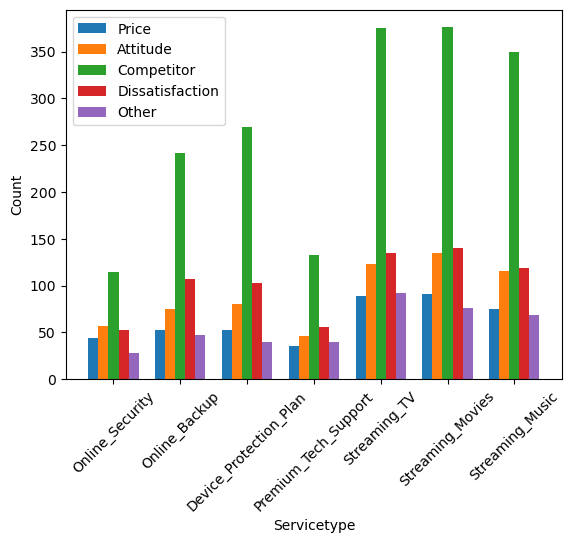

In [17]:
#Phân bổ nguyên nhân khách hàng rời bỏ dịch vụ dựa trên sản phẩm dịch vụ đi kèm
#Truy xuất dữ liệu
df_Churn_Category = df.groupby('Churn_Category').agg({'Online_Security': lambda x: (x == 'Yes').sum()
                                             , 'Online_Backup': lambda x: (x == 'Yes').sum()
                                             , 'Device_Protection_Plan': lambda x: (x == 'Yes').sum()
                                             , 'Premium_Tech_Support': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_TV': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_Movies': lambda x: (x == 'Yes').sum()
                                             , 'Streaming_Music': lambda x: (x == 'Yes').sum()}).reset_index()
df_Churn_Category_trans = df_Churn_Category.set_index('Churn_Category').transpose().reset_index()
df_Churn_Category_tran = df_Churn_Category_trans.rename (columns = {'index': 'Servicetype'})

print(df_Churn_Category_tran.head(10))
# Vẽ biểu đồ
width = 0.15

x = list(range(len(df_Churn_Category_tran['Servicetype'])))

plt.bar(x, df_Churn_Category_tran['Price'], width=width, label='Price')
plt.bar([i+width for i in x], df_Churn_Category_tran['Attitude'], width=width, label='Attitude')
plt.bar([i+2*width for i in x], df_Churn_Category_tran['Competitor'], width=width, label='Competitor')
plt.bar([i+3*width for i in x], df_Churn_Category_tran['Dissatisfaction'], width=width, label='Dissatisfaction')
plt.bar([i+4*width for i in x], df_Churn_Category_tran['Other'], width=width, label='Other')

plt.xlabel('Servicetype')
plt.ylabel('Count')
plt.xticks([i+2*width for i in x], df_Churn_Category_tran['Servicetype'], rotation=45)
plt.legend()

plt.show()

Nguyên nhân rời bỏ dịch vụ cao nhất là vì đối thủ cạnh tranh, tiếp theo đó là sự không hài lòng về thái độ nhân viên, và chất lượng dịch vụ.

                                 Churn_Reason  Customer_ID
0                Attitude of service provider           94
1                  Attitude of support person          220
2               Competitor had better devices          313
3                Competitor made better offer          311
4   Competitor offered higher download speeds          100
5                Competitor offered more data          117
6                                    Deceased            6
7                                  Don't know          130
8                          Extra data charges           39
9    Lack of affordable download/upload speed           30
10            Lack of self-service on Website           29
11                  Limited range of services           37
12                      Long distance charges           64
13                                      Moved           46
14                        Network reliability           72
15           Poor expertise of online support           

Text(0.5, 1.0, 'Churn_Reason')

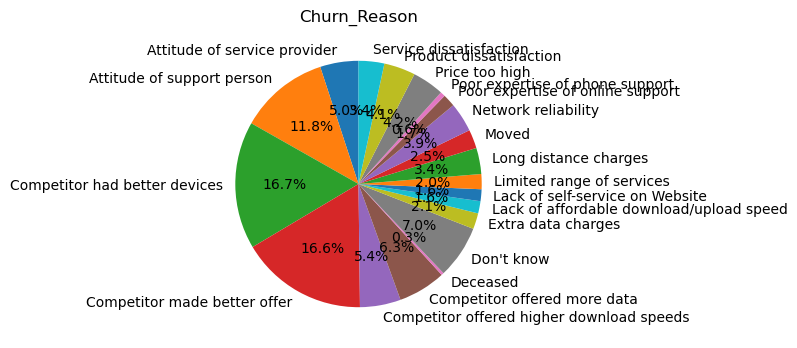

In [20]:
#Phân bổ nguyên nhân chi tiết khách hàng rời bỏ dịch vụ

df_churnreason = df.groupby('Churn_Reason').agg({'Customer_ID': 'count'
                                                                                    }).reset_index()
print(df_churnreason.head(30))

#Vẽ biểu đồ
fig, ax1 = plt.subplots(figsize=[12, 4])

ax1.pie(df_churnreason['Customer_ID'], labels=df_churnreason['Churn_Reason'], startangle=90, autopct='%1.1f%%')
ax1.set_title('Churn_Reason')

In [19]:
#Phân tích yếu tố cước phí đường dài có ảnh hưởng đến sự rời bỏ của khách hàng hay không?

##Truy xuất dữ liệu
def count_vip(x):
    return sum(x == 'VIP')

df_chargeVIP = df.groupby('Charge_Distance_Group')['Customer_rank'].apply(count_vip).reset_index(name='VIP_count')
print(df_chargeVIP.head(5))

def count_churn(x):
    return sum(x == 'Churned')

df_chargeChurn = df.groupby('Charge_Distance_Group')['Customer_rank'].apply(count_churn).reset_index(name='Churn_count')
print(df_chargeChurn.head(5))

#Vẽ biểu đồ
fig, ax = plt.subplots(1, 2, figsize=[12, 4])

sns.barplot(data=df_chargeVIP, x=df_chargeVIP['Charge_Distance_Group'], y=df_chargeVIP['VIP_count'], ax=ax[0])
sns.barplot(data=df_chargeChurn, x=df_chargeChurn['Charge_Distance_Group'], y=df_chargeChurn['Churn_count'], ax=ax[1])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=35)
ax[1].set_xticklabels(ax[1].get_xticklabels(), rotation=35)

ax[0].set_title("CustomerChurn_by_Month-to-Month")
ax[1].set_title("CustomerVIP_by_Month-to-Month")

plt.show()

KeyError: 'Charge_Distance_Group'

In [ ]:
##Phân bổ nguyên nhân chi tiết dựa trên các nhóm nguyên nhân chính

#Truy xuất dữ liệu
df_churnreasonpri = df[df['Churn_Category'] == 'Price'].groupby('Churn_Reason').agg({'Customer_ID': 'count'
                                                                                    }).reset_index()
print(df_churnreasonpri)

#Churn category is Attitude
df_churnreasonatti = df[df['Churn_Category'] == 'Attitude'].groupby('Churn_Reason').agg({'Customer_ID': 'count'
                                                                                        }).reset_index()
print(df_churnreasonatti)

#Churn category is Competitor
df_churnreasoncompe = df[df['Churn_Category'] == 'Competitor'].groupby('Churn_Reason').agg({'Customer_ID': 'count'
                                                                                           }).reset_index()
print(df_churnreasoncompe)

#Churn category is Dissatisfaction
df_churnreasondissati = df[df['Churn_Category'] == 'Dissatisfaction'].groupby('Churn_Reason').agg({'Customer_ID': 'count'
                                                                                                  }).reset_index()
print(df_churnreasondissati)

#Churn category is Other
df_churnreasonorther = df[df['Churn_Category'] == 'Other'].groupby('Churn_Reason').agg({'Customer_ID': 'count'
                                                                                       }).reset_index()
print(df_churnreasonorther)

#Vẽ biểu đồ

fig, ax1 = plt.subplots(2, 2, figsize=[12, 6])

ax1[0, 0].pie(df_churnreasonpri['Customer_ID'], labels=df_churnreasonpri['Churn_Reason'], startangle=90, autopct='%1.1f%%')
ax1[0, 0].set_title('Churn_category_is_Price')

ax1[0, 1].pie(df_churnreasonatti['Customer_ID'], labels=df_churnreasonatti['Churn_Reason'], startangle=90, autopct='%1.1f%%')
ax1[0, 1].set_title('Churn_category_is_Attitude')

ax1[1, 0].pie(df_churnreasoncompe['Customer_ID'], labels=df_churnreasoncompe['Churn_Reason'], startangle=90, autopct='%1.1f%%')
ax1[1, 0].set_title('Churn_category_is_Competitor')

ax1[1, 1].pie(df_churnreasondissati['Customer_ID'], labels=df_churnreasondissati['Churn_Reason'], startangle=90, autopct='%1.1f%%')
ax1[1, 1].set_title('Churn_category_is_Dissatisfaction')

plt.show()


In [ ]:
import pandas as pd

bins = [0, 10, 20, 30, 40, 50]
labels = ['1-10', '10-20', '20-30', '30-40', '40-50']
df['Charge_Distance_Group'] = pd.cut(df['Avg_Monthly_Long_Distance_Charges'], bins=bins, labels=labels)
df.head(10)


- Dựa vào phân tích trên ta thấy rằng mức giá dựa trên khoảng cách không làm ảnh hưởng đến quyết định rời bỏ của khách hàng, và yếu tố giá cả cũng chỉ chiếm 4.2% so với tổng nguyên nhân.

- Nguyên nhân chính là do đối thủ cạnh tranh có thiết bị tốt hơn, hợp đồng có nhiều lựa chọn hơn và thái độ người hỗ trợ tốt hơn.

=> Vì thế Công ty phải tập trung cải thiện chất lượng thiết bị, thay đỗi những dịch vụ, điều khoản, đặc quyền trong hợp đồng và thái độ của nhân viên, tập trung vào 3 dịch vụ đi kèm Streaming và các loại hợp đồng ngắn hạn để có thể cải thiện tình trạng khách hàng rời bỏ dịch vụ của Công ty.